# Project: Predict the default of a credit card

Problem: Trying to predict if someone is going to default on their credit card. The type of machine learning is supervised, due to having a target variable.


The training data set includes a binary variable, default payment (Yes = 1, No = 0), as the target variable, and the following 23 variables as the features variables:

- X1: Amount of the given credit 
- X2: Gender (1 = male; 2 = female) 
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others) 
- X4: Marital status (1 = married; 2 = single; 3 = others) 
- X5: Age 
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
- X12-X17: Amount of bill statement. X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
- X18-X23: Amount of previous payment. X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 

Hint: Check the target variable; is the classes balanced or imbalanced?


data file: https://raw.githubusercontent.com/franklin-univ-data-science/data/master/credit_default.csv 
 

In [ ]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Import ML modules
from sklearn.linear_model import LogisticRegression

### Initial Data Exploration

In [ ]:


data = pd.read_csv('https://raw.githubusercontent.com/franklin-univ-data-science/data/master/credit_default.csv')
# Drop ID column
data = data.drop('ID', axis = 1)

data.sample(20)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
12119,20000,2,1,2,22,1,2,2,0,0,2,11087,11712,11164,11395,11927,9186,1100,0,289,594,0,50,0
2585,100000,1,2,2,25,0,0,0,0,-2,-2,76222,79564,49000,-1000,0,0,4700,1500,0,31000,0,0,0
13856,170000,1,1,2,28,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,1
23248,80000,2,3,1,36,0,0,0,0,0,0,65205,72922,74943,75399,53373,55554,20000,5000,3000,5000,3000,3000,0
6011,280000,2,1,1,30,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0
5124,150000,2,1,1,40,1,-1,-1,0,-1,-1,-15,17671,14517,1870,3495,0,17686,14517,0,3495,0,21754,0
18119,100000,1,2,2,35,0,0,0,0,0,0,95271,97243,99400,88037,59213,56651,3558,3803,3146,2514,3000,2500,0
28024,360000,2,3,1,32,0,0,0,0,0,0,227689,206249,182985,186047,188389,191907,7142,8200,7600,6200,6000,7000,0
22042,150000,2,1,2,25,1,-2,-2,-2,-2,-1,0,0,0,0,0,9240,0,0,0,0,9240,0,0
5375,360000,2,1,2,28,-2,-2,-2,-2,-2,-2,23088,11628,8556,4578,4784,11938,12000,8598,4601,4808,11997,3708,0


In [ ]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
data['Y'].value_counts()


0    23364
1     6636
Name: Y, dtype: int64

Target is unbalanced, approximately 22% of the records defaulted on their payment.

In [ ]:
data['X2'].value_counts().sort_index()

1    11888
2    18112
Name: X2, dtype: int64

In [ ]:
data['X3'].value_counts().sort_index()

0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: X3, dtype: int64

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)

There are a few values outside of the described values for X3: Education. Records with 0, 5, 6 will be reclassified as other.

In [ ]:
edu_other = (data['X3'] == 0) | (data['X3'] > 4)
data.loc[edu_other, 'X3'] = 4
data['X3'].value_counts().sort_index()

1    10585
2    14030
3     4917
4      468
Name: X3, dtype: int64

X4: Marital Status (1 = married; 2 = single; 3 = others). Zero will be classified as 3: other.

In [ ]:
data['X4'].value_counts().sort_index()

0       54
1    13659
2    15964
3      323
Name: X4, dtype: int64

In [ ]:
marriage_other = (data['X4'] == 0)
data.loc[marriage_other, 'X4'] = 3
data['X4'].value_counts().sort_index()

1    13659
2    15964
3      377
Name: X4, dtype: int64

#### Cleaning X6 - X11
In these features, -1 is an on-time payment and a value greater than 0 is late by that number of months. Each of these features has values less than -1 and 0. I am assuming that these are duly paid and will change the values to -1.

In [ ]:
df = data.iloc[:,5:11]
df.describe()

,X6,X7,X8,X9,X10,X11
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [ ]:
cols = ['X6', 'X7', 'X8', 'X9', 'X10', 'X11']
for col in cols:
  val_change = (data[col] < -1) | (data[col] == 0)
  data.loc[val_change, col] = -1

df = data.iloc[:,5:11]
df.describe()



,X6,X7,X8,X9,X10,X11
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.415967,-0.532033,-0.555500,-0.624233,-0.679567,-0.670800
std,1.142591,1.146393,1.126275,1.067522,1.001726,1.005283
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
75%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


### Categorical Features and Target


#### Gender

In [ ]:
pd.crosstab(data['X2'],
            data['Y'])


Y,0,1
X2,,
1,9015,2873
2,14349,3763


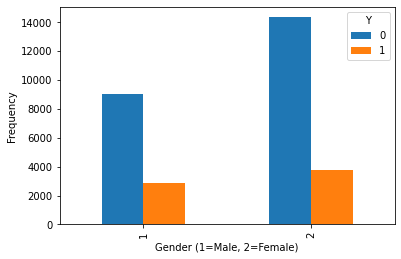

In [ ]:
data.groupby(['X2', 'Y']).size().unstack().plot(kind='bar')
plt.xlabel("Gender (1=Male, 2=Female)")
plt.ylabel("Frequency")
plt.legend
plt.show()

In [ ]:
data[['X2', 'Y']].groupby('X2').mean().sort_values(by='Y')

,Y
X2,
2,0.207763
1,0.241672


The overall probability of default is 0.212. 

$P(Default | Female) = 0.208$  
$P(Default | Male) = 0.242$ 

Overall there are more defaults by females, but the probability of default is less given that the cardholder is female.

#### Marriage

In [ ]:
pd.crosstab(data['X4'],
            data['Y'])

Y,0,1
X4,,
1,10453,3206
2,12623,3341
3,288,89


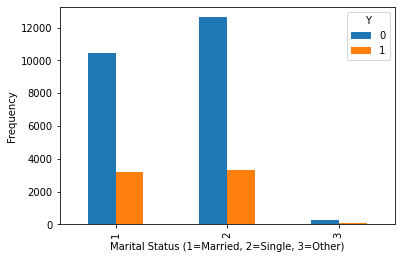

In [ ]:
data.groupby(['X4', 'Y']).size().unstack().plot(kind='bar')
plt.xlabel("Marital Status (1=Married, 2=Single, 3=Other)")
plt.ylabel("Frequency")
plt.legend
plt.show()

In [ ]:
data[['X4', 'Y']].groupby('X4').mean().sort_values(by='Y')

,Y
X4,
2,0.209283
1,0.234717
3,0.236074


The probability of default given marital status is pretty similar across the board.

#### Education

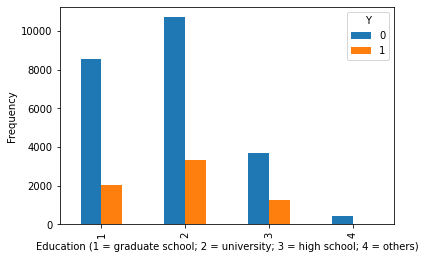

In [ ]:
data.groupby(['X3', 'Y']).size().unstack().plot(kind='bar')
plt.xlabel("Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)")
plt.ylabel("Frequency")
plt.legend
plt.show()

In [ ]:
data[['X3', 'Y']].groupby('X3').mean().sort_values(by='Y')

,Y
X3,
4,0.070513
1,0.192348
2,0.237349
3,0.251576


There are some differences in the probabilites of default given education level. Cardholders with graduate school education are less likely to default than college or high school graduates.

#### Feature Engineering
Look at binned ages, the comninations of marriage status and sex, education and sex.

We are ready to one-hot encode and split the data.

In [ ]:
data['X5'].describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: X5, dtype: float64

(array([5.127e+03, 8.261e+03, 6.514e+03, 4.812e+03, 2.606e+03, 1.836e+03,
        6.280e+02, 1.710e+02, 4.000e+01, 5.000e+00]),
 array([21. , 26.8, 32.6, 38.4, 44.2, 50. , 55.8, 61.6, 67.4, 73.2, 79. ]),
 <a list of 10 Patch objects>)

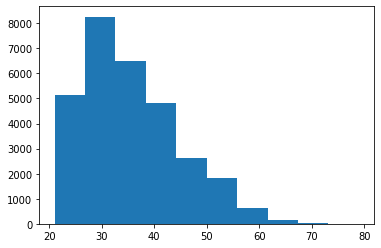

In [ ]:
#Age Range is 21 - 79
plt.hist(data['X5'])

(array([ 9618., 11238.,  6464.,  2680.]),
 array([20, 30, 40, 50, 80]),
 <a list of 4 Patch objects>)

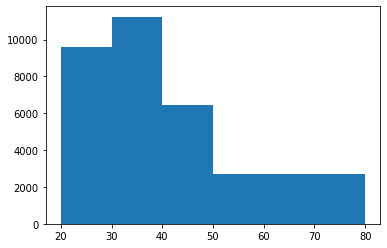

In [ ]:
#Age Range is 21 - 79
plt.hist(data['X5'], bins=[20,30,40,50,80])

In [ ]:
bins = [20, 29, 39, 49, 80]
bin_names = [i for i in range(len(bins)-1)]
data['age_bins'] = pd.cut(data['X5'], bins, labels=bin_names)
#Binning appears as intended
data[['X5','age_bins']].sample(20)

,X5,age_bins
23882,27,0
26692,27,0
4588,43,2
26342,27,0
23099,44,2
826,24,0
6510,38,1
15693,29,0
11432,31,1
9538,31,1


In [ ]:
#Marriage by Sex Combo

data['Marr_Sex'] = data.groupby(['X2', 'X4'], sort = False).ngroup()
data[['X2', 'X4', 'Marr_Sex']].sample(10)

,X2,X4,Marr_Sex
9440,2,1,0
20975,1,2,3
25713,2,2,1
14494,1,2,3
10383,2,2,1
3290,2,2,1
19411,2,1,0
10861,2,2,1
28533,2,1,0
7552,2,2,1


Marr_Sex Definitions:
* 0 = 2-1: Female-Married
* 1 = 2-2: Female-Single
* 2 = 1-1: Male-Married
* 3 = 1-2: Male-Single
* 4 = 2-3: Female-Other
* 5 = 1-3: Male-Other

In [ ]:
pd.crosstab(data['Marr_Sex'],
            data['Y'])

Y,0,1
Marr_Sex,,
0,6609,1860
1,7555,1856
2,3844,1346
3,5068,1485
4,185,47
5,103,42


In [ ]:
data[['Marr_Sex', 'Y']].groupby('Marr_Sex').mean().sort_values(by='Marr_Sex')

,Y
Marr_Sex,
0,0.219625
1,0.197216
2,0.259345
3,0.226614
4,0.202586
5,0.289655


Men that are not single appear to be at higher risk to default (2 and 5)

In [ ]:
# Sex by Education Combo
data['Edu_Sex'] = data.groupby(['X2', 'X3'], sort = False).ngroup()
data[['X2', 'X3', 'Edu_Sex']].sample(20)

,X2,X3,Edu_Sex
21364,1,2,1
22371,2,2,0
20592,1,2,1
26694,1,3,4
18243,1,3,4
13413,2,2,0
21700,2,3,3
24559,1,2,1
16113,2,2,0
14529,1,3,4


Edu_Sex Definitions:
* 0 = 2-2: Female-Undergrad
* 1 = 1-2: Male-Undergrad
* 2 = 1-1: Male-Graduate
* 3 = 2-3: Female-Highschool
* 4 = 1-3: Male-Highschool
* 5 = 2-1: Female-Graduate
* 6 = 2-4: Female-Other
* 7 = 1-4: Male-Other

In [ ]:
pd.crosstab(data['Edu_Sex'],
            data['Y'])

Y,0,1
Edu_Sex,,
0,6734,1922
1,3966,1408
2,3448,906
3,2235,692
4,1445,545
5,5101,1130
6,279,19
7,156,14


In [ ]:
data[['Edu_Sex', 'Y']].groupby('Edu_Sex').mean().sort_values(by='Edu_Sex')

,Y
Edu_Sex,
0,0.222043
1,0.262002
2,0.208085
3,0.236420
4,0.273869
5,0.181351
6,0.063758
7,0.082353


Men with highschool or undergraduate education have a higher risk to default. People classified as having an other education have a much lower risk of default.

In [ ]:

data['credit_used'] = data['X12'] / data['X1']
data[['X12', 'X1', 'credit_used', 'Y']].sample(20)

,X12,X1,credit_used,Y
9688,56009,100000,0.560090,0
19278,263,50000,0.005260,0
19047,80903,190000,0.425805,0
1130,234328,230000,1.018817,1
4265,218570,500000,0.437140,0
20467,9861,10000,0.986100,0
22429,15349,150000,0.102327,0
29108,50525,50000,1.010500,1
9755,51028,140000,0.364486,0
20444,218318,140000,1.559414,0


In [ ]:
#One-hot encode nominal categorical variables.
# First I had to convert to a string, then get_dummies. The first column of each type was dropped to prevent multicolinearity
data[['X2', 'X3', 'X4', 'age_bins', 'Marr_Sex', 'Edu_Sex']] = data[['X2', 'X3', 'X4', 'age_bins', 'Marr_Sex', 'Edu_Sex']].astype(str)

data = pd.get_dummies(data, drop_first=True)

##Next Steps
### Split Data
* Split Data 80, 20
* Explore Upsampling and Downsampling
  * Upsample 1s
  * Downsample 0s
  * Synthetic Minority Over-Sampling (SMOTE)
    * Do you remember what lecture this was in?

### Build Pipelines for different classification algos
``` python
pipeline = make_pipeline(
  StandardScaler(),
  PCA(),
  Algo()
)
```
### Grid Search
```
# Params to use for grid search
grid_params = {}

# Cross-Validation Grid Search
gs = GridSearchCV((estimator = pipeline, 
                  param_grid = grid_params, 
                  scoring = 'accuracy', 
                  cv = 10, # Number of cross-folds
                  n_jobs = -1,
                  verbose = 0)

# Perform Grid Search
gs = gs.fit(X_train, y_train)
print(f'Best score: {gs.best_score_ : .5f}')
for param, value in gs.best_params_.items():
  print(f'{param}:  {value}')
```

### Final Model Selection
### Model Evaluation Using Test Data


## Split Data

In [ ]:
# Do we drop age since we have age bins?
X = data.loc[:, data.columns != 'Y']
y = data['Y']

In [ ]:
print (X.shape, y.shape)

(30000, 42) (30000,)


In [ ]:
X.head()

,X1,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,credit_used,X2_2,X3_2,X3_3,X3_4,X4_2,X4_3,age_bins_1,age_bins_2,age_bins_3,Marr_Sex_1,Marr_Sex_2,Marr_Sex_3,Marr_Sex_4,Marr_Sex_5,Edu_Sex_1,Edu_Sex_2,Edu_Sex_3,Edu_Sex_4,Edu_Sex_5,Edu_Sex_6,Edu_Sex_7
0,20000,24,2,2,-1,-1,-1,-1,3913,3102,689,0,0,0,0,689,0,0,0,0,0.195650,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,120000,26,-1,2,-1,-1,-1,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,0.022350,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,90000,34,-1,-1,-1,-1,-1,-1,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0.324878,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,50000,37,-1,-1,-1,-1,-1,-1,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0.939800,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,50000,57,-1,-1,-1,-1,-1,-1,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0.172340,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0


In [ ]:
# ## Upsample pseudocode
# from sklearn.utils import resample
# X_upsampled, y_upsampled = resample(X_imb[y_imb == 1],
#                 y_imb[y_imb == 1],/
#                 replace=True,
#                 n_samples=X_imb[y_imb == 0].shape[0],
#                 random_state=123)

# # Downsample pseudocode
# X_dnsampled, y_dnsampled = resample(X_imb[y_imb == 0,
#                 y_imb[y_imb == 0],/
#                 replace=True,
#                 n_samples=X_imb[y_imb == 1].shape[1],
#                 random_state=123)

In [ ]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)



In [ ]:
## Upsample pseudocode
from sklearn.utils import resample
X_upsampled, y_upsampled = resample(X_train[y_train == 1],
                y_train[y_train == 1],
                replace=True,
                n_samples=X_train[y_train == 0].shape[0],
                random_state=123)

X_bal_up = np.vstack((X[y == 0], X_upsampled))
y_bal_up = np.hstack((y[y == 0], y_upsampled))



In [ ]:
print(X_upsampled.shape, y_upsampled.shape)

(18661, 42) (18661,)


In [ ]:
## Upsample pseudocode
from sklearn.utils import resample
X_dnsampled, y_dnsampled = resample(X_train[y_train == 0],
                y_train[y_train == 0],
                replace=True,
                n_samples=X_train[y_train == 1].shape[1],
                random_state=123)

X_bal_dn = np.vstack((X[y == 0], X_dnsampled))
y_bal_dn = np.hstack((y[y == 0], y_dnsampled))

In [ ]:
# Pipeline Logistic Regression - jj
pipeline_lr = make_pipeline(
  StandardScaler(),
  PCA(),
  LogisticRegression()
)



In [ ]:
#KNN
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

pipe_knn_gs = make_pipeline(StandardScaler(),
                        PCA(n_components=10),
                        KNeighborsClassifier(n_neighbors=10))

param_range = [i for i in range(1,10)]

param_grid = {'kneighborsclassifier__n_neighbors': param_range}
               # note that, the name of hypyerparameter is defined by: 
               # lower case algorithm name + double underscores + parameter

gs = GridSearchCV(estimator=pipe_knn_gs, 
                  param_grid=param_grid, 
                  scoring='accuracy', # evaluation metric
                  cv=10, # fold of corss validation
                  n_jobs=-1) # parallel calculation using all the processors

gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)


0.7948333333333334
{'kneighborsclassifier__n_neighbors': 8}


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

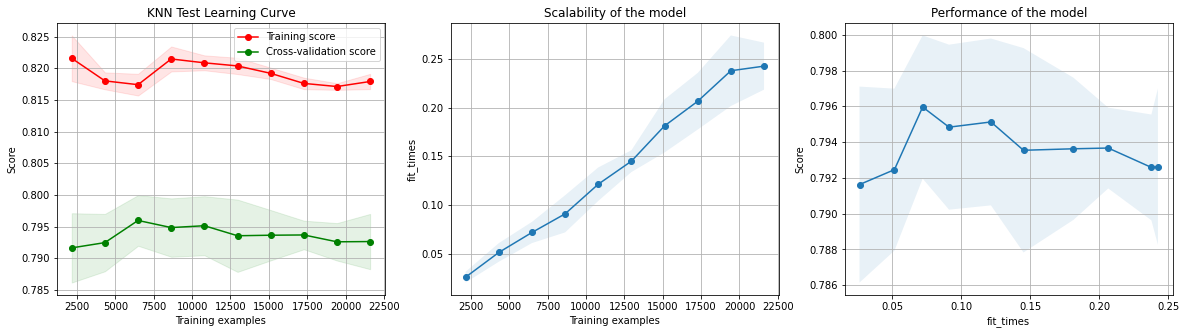

In [ ]:
pipe_knn_gs = make_pipeline(StandardScaler(),
                        PCA(n_components=3),
                        KNeighborsClassifier(n_neighbors=10))

plot_learning_curve(pipe_knn_gs, 'KNN Test Learning Curve', X_train, y_train, axes=None, ylim=None, cv=10,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10))

KNN tend to overfit the training set.

In [ ]:
# RFC Parameters tunning 
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=2, scoring="accuracy", n_jobs= 1, verbose = 1)

gsRFC.fit(X_train,y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 2 folds for each of 54 candidates, totalling 108 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed: 14.6min finished


0.8165

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

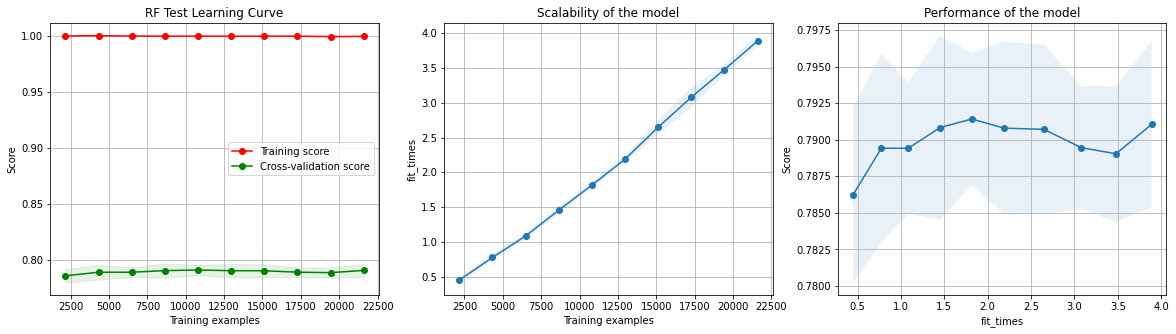

In [ ]:
pipe_rf_gs = make_pipeline(StandardScaler(),
                        PCA(n_components=3),
                        RandomForestClassifier())

plot_learning_curve(pipe_rf_gs, 'RF Test Learning Curve', X_train, y_train, axes=None, ylim=None, cv=10,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


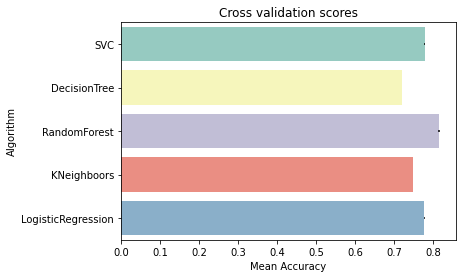

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))


cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = 2, n_jobs=1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree",
"RandomForest","KNeighboors","LogisticRegression"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=1))

param_range = [0.1, 1]

param_grid = [{'svc__C': param_range, 
               # note that, the name of hypyerparameter is defined by: 
               # lower case algorithm name + double underscores + parameter
               'svc__kernel': ['linear']},
              {'svc__C': param_range, 
               'svc__gamma': param_range, 
               'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring='accuracy', # evaluation metric
                  cv=10, # fold of corss validation
                  n_jobs=1) # parallel calculation using all the processors

gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)


In [ ]:
### SVC classifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=2, scoring="accuracy", n_jobs= 1, verbose = 1)

gsSVMC.fit(X_train,y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_